This notebook was created during compilation of Instacart report (Task 4.10).
It contains graphics relevant to the analysis, which were not made previously.

01- Price range bar chart.

02- Customer's loyalty bar chart.

03- Family profile/loyalty bar chart.

04- Spending habits and loyalty bar chart.

05- Spending habits per region bar chart.

06- Price profiling by department.



01. Starting new notebook, importing dataframe and establishing path

In [1]:
# Importing Analitycal and Visual libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Establishing a path to import data frames
path = r'C:\Users\Paola\Desktop\Shaul\Data\CF\August-2023 Instacart Basket Analysis'

In [3]:
# Importing 'subfinal.pkl' data set
subfinal = pd.read_pickle(os.path.join(path, '2-Data', 'Prepared Data', 'subfinal.pkl'))

In [4]:
subfinal.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest days',
       'Busiest hours', 'max_order', 'loyalty_flag', 'avg_prices',
       'spending_flag', 'median_prior_order', 'frequency_flag', 'gender',
       'state', 'age', 'dependants', 'civil_status', 'income', 'region',
       'exclusion_flag', 'department', 'age_group', 'dependants_category',
       'income_group', 'family_situation', 'income_situation',
       'busiest_period_week', 'busiest_period_day'],
      dtype='object')

Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

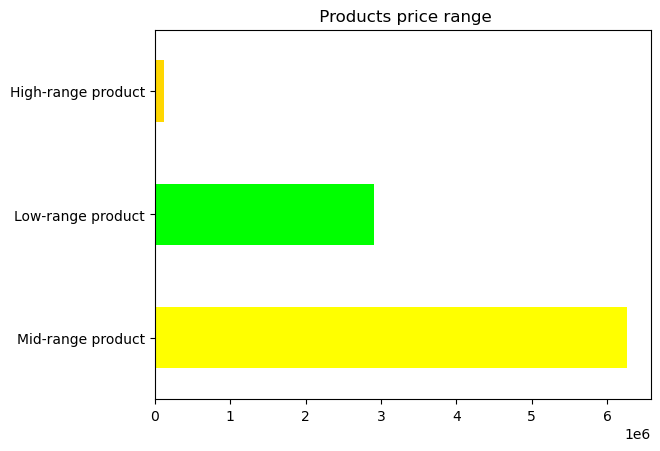

In [4]:
# Starting with bar chart
price_range = subfinal['price_range_loc'].value_counts().plot.barh(color = ['yellow', 'lime', 'gold'], title = ' Products price range')

In [5]:
# Exporting and saving it to Folder
price_range.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Price range.png'))

More than 67% of all products fall into the mid range category, with 31% being considered mid-range.
Only 1% of all products are considered 'expensive' or high range. This is also consistent with the histogram 
of prices from products.

Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

The departments 'produce', dairy & eggs', 'snacks', 'beverages', and 'frozen' account for 70% of all Instacarts's 
orders. The departments 'international, 'alcohol', 'pets', 'other' and 'bulk' account for less than 2% of all orders.

What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)? 

Creating visualisation for Customer's loyalty.

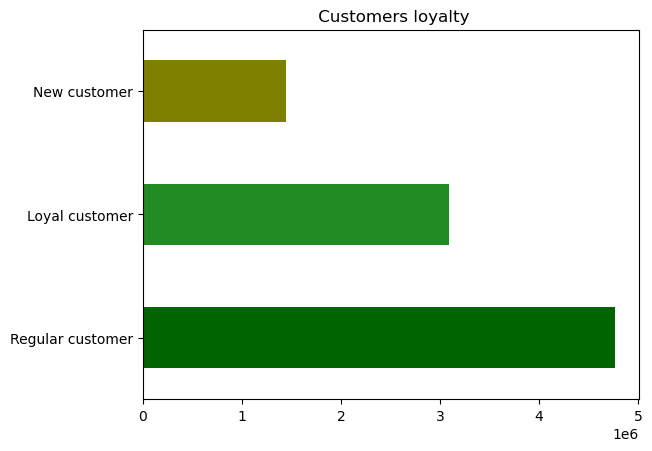

In [9]:
# Starting with bar chart
Custloyal = subfinal['loyalty_flag'].value_counts().plot.barh(color = ['darkgreen', 'forestgreen', 'olive'], title = ' Customers loyalty')

In [10]:
# Exporting and saving it to Folder
Custloyal.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Customers loyalty.png'))

Over 50% of instacart's customers are regular customers, which means their order frequency is every 10 to 20 days. On the other hand, loyal customers account for 33% of all customers, and their order frequency is 10 days or less from the previous order. 

Checking loyalty by family profiling

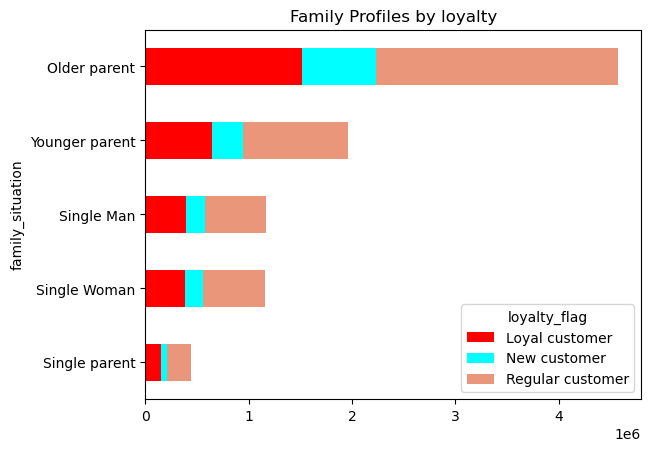

In [6]:
# Group customer profile and loyalty

familyloyal = subfinal.groupby(['family_situation', 'loyalty_flag']).size().unstack()

# Sort

familyloyal = familyloyal.loc[familyloyal.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

familyloyalbar = familyloyal.plot.barh(stacked = True, title = 'Family Profiles by loyalty', color = ['red','cyan','darksalmon', 'coral', 'orange'])

In [7]:
# Exporting and saving it to Folder
familyloyalbar.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Profile loyalty.png'))

The graphic on the right seems to confirm that profile groups follow this trend: the 'regular' colour occupies half of the bar, followed by the 'loyal' colour (two thirds of the bar), with the rest of the bar for new customers.

Are there differences in ordering habits based on a customer’s loyalty status?

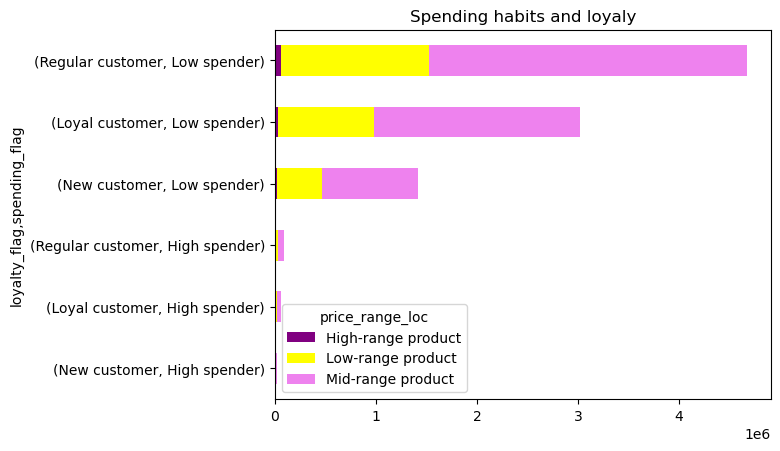

In [8]:
# Group customer profile and loyalty

spendloyal = subfinal.groupby(['loyalty_flag', 'spending_flag', 'price_range_loc']).size().unstack()

# Sort

spendloyal = spendloyal.loc[spendloyal.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

spendloyalbar = spendloyal.plot.barh(stacked = True, title = 'Spending habits and loyaly', color = ['purple','yellow','violet'])

In [9]:
# Exporting and saving it to Folder
spendloyalbar.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Profile order habits and loyalty.png'))

Are there differences in ordering habits based on a customer’s region?

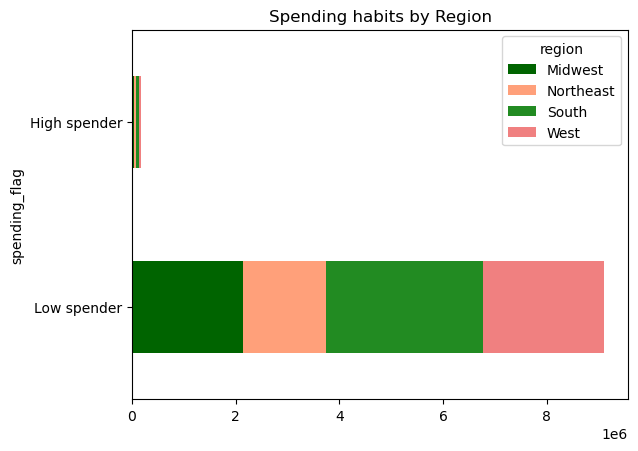

In [10]:
# Group customer profile and regions

spendingreg = subfinal.groupby(['spending_flag', 'region']).size().unstack()

# Sort

spendingreg = spendingreg.loc[spendingreg.sum(axis=1).sort_values(ascending=False).index]

# Create bar chart

spendingreg = spendingreg.plot.barh(stacked = True, title = 'Spending habits by Region', color = ['darkgreen','lightsalmon','forestgreen', 'lightcoral'])

In [26]:
# Exporting and saving it to Folder
spendingreg.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Profile order habits and loyalty.png'))

Checking price profiling by departments

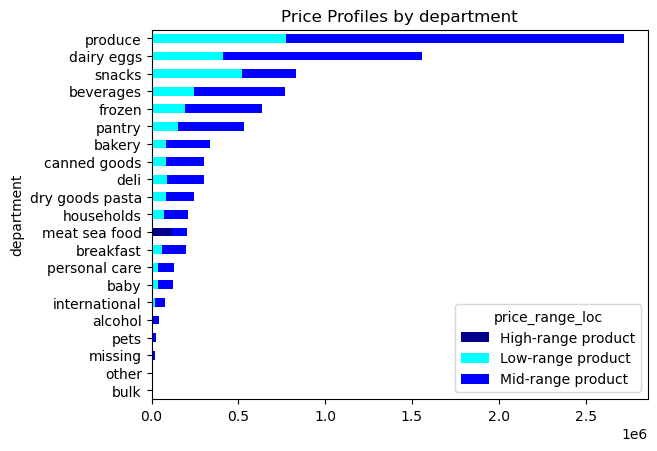

In [6]:
# Group customer profile and loyalty

pricedep = subfinal.groupby(['department', 'price_range_loc']).size().unstack()

# Sort

pricedep = pricedep.loc[pricedep.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

pricedepbar = pricedep.plot.barh(stacked = True, title = 'Price Profiles by department', color = ['darkblue','cyan','blue'])

In [7]:
# Exporting and saving it to Folder
pricedepbar.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Profile order habits and loyalty.png'))